# a) Implement a Naive Bayes Classifier (NBC), of English new paper Head Lines into Politics, Sports, Education, Healthcare, Finance ( 5- Class Labels).

### Steps Conducted For Headline Classification

1. importing dataset
2. Word Count -CountVectorizer
3. Term Frequancy Inverse Document Frequancy
4. Naive Bayes Classifier
5. Result

### importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder



import re
import warnings
warnings.filterwarnings("ignore")

nltk.download('stopwords')
nltk.download('punkt')
import pickle

[nltk_data] Downloading package stopwords to C:\Users\Krishna
[nltk_data]     Desai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Krishna
[nltk_data]     Desai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


###  1. import dataset for news headline classification

In [2]:
dataset=pd.read_json('https://raw.githubusercontent.com/Hsankesara/DeepResearch/master/Hierarchical_Attention_Network/News_Category_Dataset/News_Category_Dataset.json',lines=True)

In [3]:
dataset.head()

,short_description,headline,date,link,authors,category
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018-05-26,https://www.huffingtonpost.com/entry/jim-carre...,Ron Dicker,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,2018-05-26,https://www.huffingtonpost.com/entry/julianna-...,Ron Dicker,ENTERTAINMENT


In [4]:
print(dataset.shape)


(124989, 6)


In [5]:
dataset.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS'],
      dtype=object)

## Filter dataset  according to our requirements

In [6]:
df_filtered = dataset[(dataset.category=='ENTERTAINMENT') | (dataset.category=='POLITICS') | (dataset.category=='SPORTS') | (dataset.category=='BUSINESS') |  (dataset.category=='EDUCATION')|(dataset.category=='HEALTHY LIVING')]

In [7]:
df_filtered.to_csv('News_classification.csv')

In [86]:
df=pd.read_csv('News_classification.csv')
df.head(30)

,Unnamed: 0,short_description,headline,date,link,authors,category
0,1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT
1,2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT
2,3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018-05-26,https://www.huffingtonpost.com/entry/jim-carre...,Ron Dicker,ENTERTAINMENT
3,4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,2018-05-26,https://www.huffingtonpost.com/entry/julianna-...,Ron Dicker,ENTERTAINMENT
4,5,"""It is not right to equate horrific incidents ...",Morgan Freeman 'Devastated' That Sexual Harass...,2018-05-26,https://www.huffingtonpost.com/entry/morgan-fr...,Ron Dicker,ENTERTAINMENT
5,6,"It's catchy, all right.",Donald Trump Is Lovin' New McDonald's Jingle I...,2018-05-26,https://www.huffingtonpost.com/entry/donald-tr...,Ron Dicker,ENTERTAINMENT
6,7,There's a great mini-series joining this week.,What To Watch On Amazon Prime That’s New This ...,2018-05-26,https://www.huffingtonpost.com/entry/amazon-pr...,Todd Van Luling,ENTERTAINMENT
7,8,"Myer's kids may be pushing for a new ""Powers"" ...",Mike Myers Reveals He'd 'Like To' Do A Fourth ...,2018-05-26,https://www.huffingtonpost.com/entry/mike-myer...,Andy McDonald,ENTERTAINMENT
8,9,You're getting a recent Academy Award-winning ...,What To Watch On Hulu That’s New This Week,2018-05-26,https://www.huffingtonpost.com/entry/hulu-what...,Todd Van Luling,ENTERTAINMENT
9,10,"The pop star also wore a ""Santa Fe Strong"" shi...",Justin Timberlake Visits Texas School Shooting...,2018-05-26,https://www.huffingtonpost.com/entry/justin-ti...,Sebastian Murdock,ENTERTAINMENT


## Feature selection

In [87]:
df=df[['headline','category']]

df=pd.DataFrame(df)

In [88]:
df.replace('HEALTHY LIVING','HEALTHCARE',inplace=True)
df.replace('BUSINESS','FINANCE',inplace=True)

In [89]:
df

,headline,category
0,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT
1,Hugh Grant Marries For The First Time At Age 57,ENTERTAINMENT
2,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT
3,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT
4,Morgan Freeman 'Devastated' That Sexual Harass...,ENTERTAINMENT
...,...,...
63110,GOP's Old Ploy: Tag President Obama as the Rac...,POLITICS
63111,Lawmakers Introduce Bill To Tackle Misleadingl...,POLITICS
63112,Dear President Obama,POLITICS
63113,The Obama Effect,POLITICS


In [90]:
print(df.shape)

#data has ROW:63115  Features:2

(63115, 2)


### Staticstic of dataset

In [91]:
df.describe()

,headline,category
count,63113,63115
unique,62950,6
top,Sunday Roundup,POLITICS
freq,90,32739


In [92]:
df.info()
# headline feature has some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63115 entries, 0 to 63114
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  63113 non-null  object
 1   category  63115 non-null  object
dtypes: object(2)
memory usage: 986.3+ KB


###  check number of null values in dataset

In [93]:
df.isnull().sum()

# headline feature has 2 null values

headline    2
category    0
dtype: int64

In [94]:
df[df['headline'].isnull()==True]

# below specific two rows has null values

,headline,category
44681,NaN,POLITICS
52707,NaN,FINANCE


In [95]:
# drop rows containing Null values
df.dropna(inplace=True)
df.reset_index()


,index,headline,category
0,0,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT
1,1,Hugh Grant Marries For The First Time At Age 57,ENTERTAINMENT
2,2,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT
3,3,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT
4,4,Morgan Freeman 'Devastated' That Sexual Harass...,ENTERTAINMENT
...,...,...,...
63108,63110,GOP's Old Ploy: Tag President Obama as the Rac...,POLITICS
63109,63111,Lawmakers Introduce Bill To Tackle Misleadingl...,POLITICS
63110,63112,Dear President Obama,POLITICS
63111,63113,The Obama Effect,POLITICS


In [96]:
df.isnull().sum()

# now there is no null values

headline    0
category    0
dtype: int64

### Understanding features and Target Variables

In [97]:
df['category'].unique()

array(['ENTERTAINMENT', 'POLITICS', 'SPORTS', 'FINANCE', 'EDUCATION',
       'HEALTHCARE'], dtype=object)

###  countplot of target feature(category)

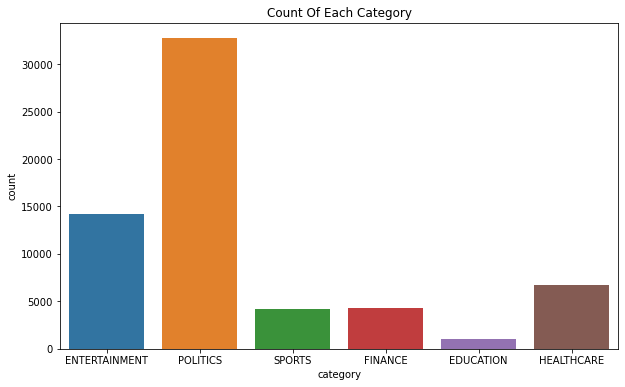

In [98]:
plt.figure(figsize=(10,6))
sb.countplot(df['category'])
plt.title('Count Of Each Category')
plt.show()

In [99]:
count=df['category'].value_counts()
count



POLITICS         32738
ENTERTAINMENT    14257
HEALTHCARE        6694
FINANCE           4253
SPORTS            4167
EDUCATION         1004
Name: category, dtype: int64

In [100]:
#### news headline related to POLITICS has highest Count

In [101]:
# count of news healine length
df['NEWs_length']=df['headline'].str.len()

In [102]:
df.NEWs_length

0        75
1        47
2        69
3        71
4        80
         ..
63110    54
63111    64
63112    20
63113    16
63114    23
Name: NEWs_length, Length: 63113, dtype: int64

### Visualization 

#### Distribution plot Newsheadline text

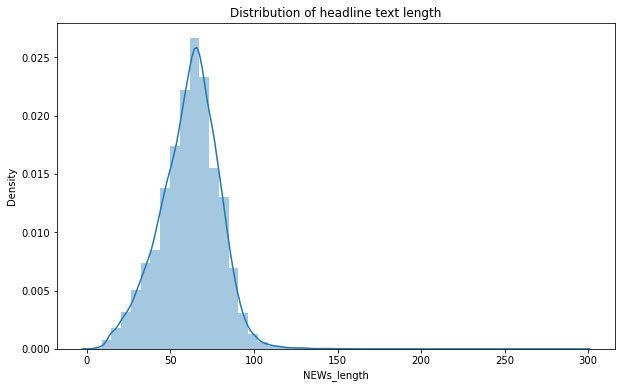

In [103]:
plt.figure(figsize=(10,6))

sb.distplot(df.NEWs_length)
plt.title('Distribution of headline text length')
plt.show()


#### WorldCloud  of each category of news headlines

In [104]:
def wordcloud(words):
    wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.show()
    

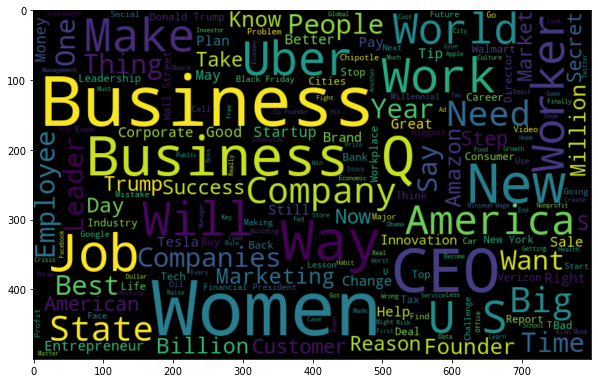

In [105]:
subset=df[df.category=='FINANCE']
text=subset.headline.values
word=" ".join(text)
wordcloud(word)

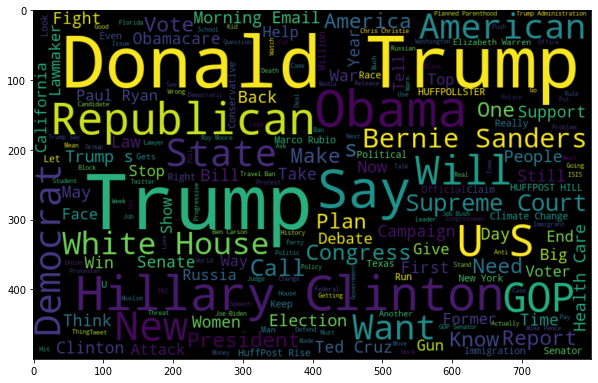

In [106]:
subset=df[df.category=='POLITICS']
text=subset.headline.values
word=" ".join(text)
wordcloud(word)

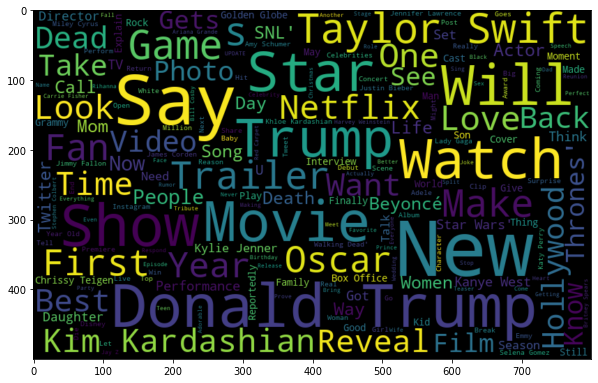

In [107]:
subset=df[df.category=='ENTERTAINMENT']
text=subset.headline.values
word=" ".join(text)
wordcloud(word)

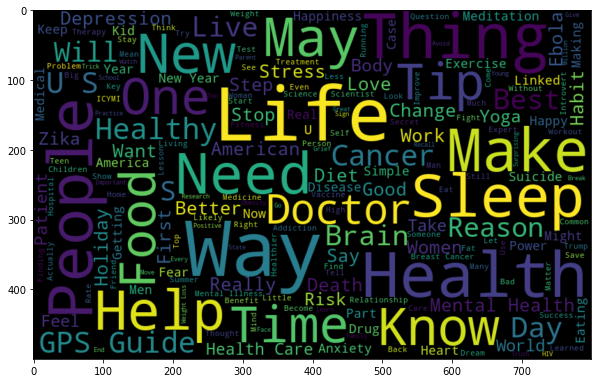

In [108]:
subset=df[df.category=='HEALTHCARE']
text=subset.headline.values
word=" ".join(text)
wordcloud(word)

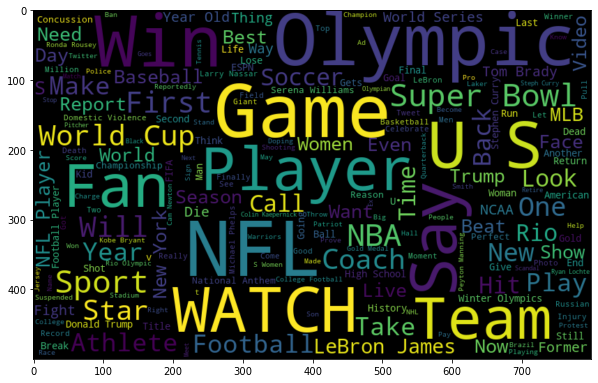

In [109]:
subset=df[df.category=='SPORTS']
text=subset.headline.values
word=" ".join(text)
wordcloud(word)

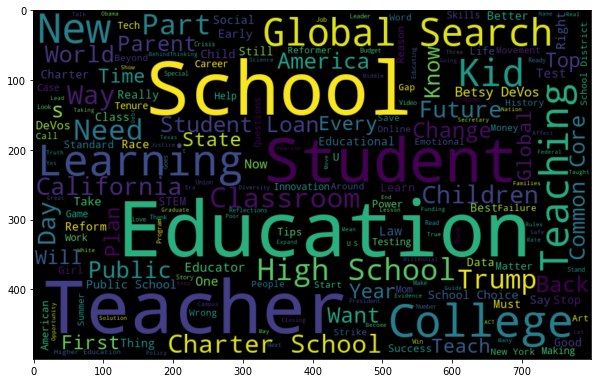

In [110]:
subset=df[df.category=='EDUCATION']
text=subset.headline.values
word=" ".join(text)
wordcloud(word)


In [111]:
categories=df['category']
headlines=df['headline']

N=len(headlines)

print('Number of news :',N)


Number of news : 63113


In [112]:
# total we have five unique category of news healine classification

categories=df.category.unique()
print("Number of news categories:",categories)

Number of news categories: ['ENTERTAINMENT' 'POLITICS' 'SPORTS' 'FINANCE' 'EDUCATION' 'HEALTHCARE']


#### Pie Chart 

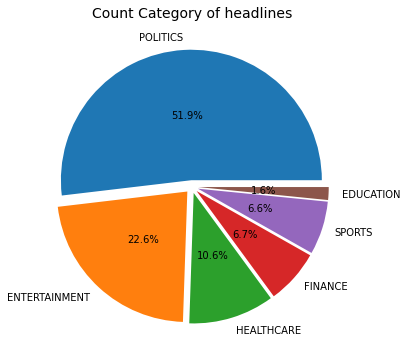

In [113]:
#Using matplotlib
labels=['POLITICS','ENTERTAINMENT','HEALTHCARE','FINANCE','SPORTS','EDUCATION']
explode=[1,0,0,0,0]
pie, ax = plt.subplots(figsize=[10,6])
labels = count.keys()
plt.pie(x=count, autopct="%.1f%%",labels=labels,pctdistance=0.5,explode=[0.05]*6)
plt.title("Count Category of headlines", fontsize=14);
pie.savefig("DeliveryPieChart.png")

In [114]:
for l in labels:
    print('number of ',l,' news',len(df.loc[df['category'] == l]))

number of  POLITICS  news 32738
number of  ENTERTAINMENT  news 14257
number of  HEALTHCARE  news 6694
number of  FINANCE  news 4253
number of  SPORTS  news 4167
number of  EDUCATION  news 1004


### LabelEncoding of target feature(category)

In [116]:

encoder = LabelEncoder()
df['category_encoded']= encoder.fit_transform(df['category'])

df.head()

,headline,category,NEWs_length,category_encoded
0,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT,75,1
1,Hugh Grant Marries For The First Time At Age 57,ENTERTAINMENT,47,1
2,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT,69,1
3,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT,71,1
4,Morgan Freeman 'Devastated' That Sexual Harass...,ENTERTAINMENT,80,1


In [131]:
#Shuffling of data 

df=shuffle(df,random_state=0)

In [132]:
df.category_encoded.unique()

array([4, 1, 2, 3, 5, 0])

- 0-->EDUCATION
- 1-->ENTERTAINMENT
- 2-->FINANCE
- 3-->HEALTHCARE
- 4-->POLITICS
- 5-->SPORTS


In [133]:
df

,headline,category,NEWs_length,category_encoded
30718,Family Of AR-15 Inventor Eugene Stoner: He Did...,POLITICS,73,4
9238,Trump And Kim Are Trading Personal Threats As ...,POLITICS,83,4
41608,Donald Trump Says He's Done Jabbing Jeb Bush,ENTERTAINMENT,44,1
35860,The WTO Gave Environmentalists A New Reason To...,FINANCE,61,2
61204,Saudi Arabia's Sectarian Challenge,POLITICS,34,4
...,...,...,...,...
17283,"[WHISPERS] Hey, You Know, Republicans Should J...",POLITICS,78,4
52099,Behind The UK's Tech Boom: 7 Factors Attractin...,FINANCE,56,2
8139,Judge Who Told Inmates To Vote For Trump Claim...,POLITICS,67,4
8044,Stop Criticizing Donald Trump. Vladimir Putin ...,POLITICS,54,4


## Text Cleaning 

In [134]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [135]:
df['Text_parsed'] = df['headline'].apply(process_text)

In [136]:
df.to_csv('processed_data')

In [155]:
df.drop('NEWs_length',inplace=True,axis=1)

## 2.Word Count -CountVectorizer
- Assign unique number to each word as:also known as 'Tokenize'
- In ML term:learn a vocabulary dictionary of all tokens in the raw documents,and it is done by using CountVectorizer().fit()

- EXAMPLE:
-  We have a text:
   Count the occurence of each word: basically in ML terms "encoding documents"
   It is done by using CountVectorizer.transform()
  
   "The quick brown fox jumped over the lazy dog."
  
   [[1 1 1 1 1 1 1 2]]
   ['brown', 'dog', 'fox', 'jumped', 'lazy', 'over', 'quick', 'the']
- It stores it as an array and its shape is: (1,8) i.e 1 no. of sample
  and 8 no. of features.

In [156]:
vectorizer = CountVectorizer()
X= df['Text_parsed']

encoder = LabelEncoder()
y = encoder.fit_transform(df['category'])

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50490,)
(50490,)
(12623,)
(12623,)


### 3.Term Frequency (TF) Inverse Document Frequency (IDF)
- Term Frequency: This summarizes how often a given word appears within a document.
- The inverse document frequencies are calculated for each word in the vocabulary,
  assigning the lowest score of 1.0 to the most frequently observed word.

### Pipelining
- The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. 

### 4. MultinomalNB(Naive Bayes Classifier)
- Naive Bayes Classifier for Multinomial models
- SKLEARN already has inbuilt Multinomial Naive Bayes Classifier package Using this package we can directly train our model with the matrix obtained from Tdidf Transformer

In [157]:
text_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB(alpha=0.05)) ])



In [158]:
# train the model
text_clf.fit(x_train,y_train)
# Predict the test cases
predicted = text_clf.predict(x_test)


## check overfitting and underfitting in model
print(text_clf.score(x_train,y_train))

print(text_clf.score(x_test,y_test))

# there is no overfitting or underfitting in model

0.9304218657159834
0.818981224748475


## 5.Result

In [159]:
#Analysis the result
#confusion matrix
# classification report
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np


print(metrics.classification_report(y_test,predicted))
confusion_matrix=metrics.confusion_matrix(y_test,predicted)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.69      0.12      0.21       201
           1       0.84      0.86      0.85      2800
           2       0.72      0.35      0.48       868
           3       0.78      0.63      0.70      1329
           4       0.82      0.95      0.88      6546
           5       0.89      0.62      0.73       879

    accuracy                           0.82     12623
   macro avg       0.79      0.59      0.64     12623
weighted avg       0.81      0.82      0.80     12623

[[  25   16   15   18  126    1]
 [   0 2418   11   39  315   17]
 [   2   37  308   92  422    7]
 [   0  102   44  836  337   10]
 [   8  197   41   64 6205   31]
 [   1  113    8   16  195  546]]


## Model is giving 82% accuracy for given classification

In [160]:
print('actual_ values:',y_test)

print('predicted_values:',predicted)

actual_ values: [2 4 2 ... 4 4 4]
predicted_values: [4 4 3 ... 4 4 4]


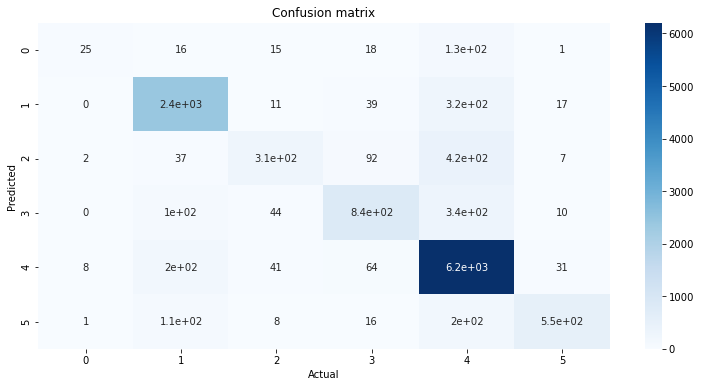

In [162]:
plt.figure(figsize=(12.8,6))
sb.heatmap(confusion_matrix, 
            annot=True,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

- 0-->EDUCATION
- 1-->ENTERTAINMENT
- 2-->FINANCE
- 3-->HEALTHCARE
- 4-->POLITICS
- 5-->SPORTS


In [163]:
#testing
t1='education is power'
print(categories[text_clf.predict([t1])])


['EDUCATION']


In [164]:
t2="David Cross Proves Yet Again That He’s Terrible At Apologizing"
print(categories[text_clf.predict([t2])])

['POLITICS']


In [165]:
t3="high price crazybusy"
print(categories[text_clf.predict([t3])])

['FINANCE']


In [174]:
t4=df.headline[2303]  ## showing missclassification 
print(t4)
print(categories[text_clf.predict([t4])])

Katy Perry Disses Taylor Swift On 'American Idol' Because Feuds Die Hard
['POLITICS']


### save the model to disk

In [52]:

filename = 'finalized_model.sav'
pickle.dump(text_clf, open(filename, 'wb'))

### load the model from disk

In [53]:

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8241305553354987


In [172]:

df[df.category_encoded==1]

,headline,category,category_encoded,Text_parsed
41608,Donald Trump Says He's Done Jabbing Jeb Bush,ENTERTAINMENT,1,donald trump says hes done jabbing jeb bush
21812,Remembering George Michael's 'Last Christmas',ENTERTAINMENT,1,remembering george michaels last christmas
2303,Katy Perry Disses Taylor Swift On 'American Id...,ENTERTAINMENT,1,katy perry disses taylor swift american idol f...
44499,USA Postpones 'Mr. Robot' Finale After WDBJ Sh...,ENTERTAINMENT,1,usa postpones mr robot finale wdbj shooting
404,Lois Lanes Pay Tribute To The Late Margot Kidd...,ENTERTAINMENT,1,lois lanes pay tribute late margot kidder led way
...,...,...,...,...
25322,The Reinvention Of Ken Jeong,ENTERTAINMENT,1,reinvention ken jeong
41371,'Today' Anchors Wear 'Charlie Brown' Costumes ...,ENTERTAINMENT,1,today anchors wear charlie brown costumes hall...
954,How Broadway's 'Frozen' Reinforces The Feminis...,ENTERTAINMENT,1,broadways frozen reinforces feminist message d...
41642,These Are The Most Controversial Celebrity Hal...,ENTERTAINMENT,1,controversial celebrity halloween costumes
